In [1]:
from numba.core.extending import get_cython_function_address
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib


In [3]:
PATHS = ["/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2020/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2021/CR3000/Sec/*.dat"]

column_names = ['TIMESTAMP',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']

ghi =  ['GHIP_SI02pt100',
        'GHIP_SMP11',
        'GHIP_SMP22',
        'GHIP_SPN1',
        'GHIT_SMP22']

gti = ['TGHIP_SI02pt100', 
       'TGHIP_SI02pt100_dirty',
       'TGIP_SMP11_VENT']
      
dif = ['DfHIP_SPN1', 
       'DfHIRP_SMP11',
       'DfHIT_SMP22',
       'DIF_GLO_REF_SPN1']

dni = ['dni_SHP1']
  
wind = ['wind_speed', 
        'wind_direction']
                
compdata = pd.DataFrame(columns = column_names)

#file_duration = pd.DataFrame(index = datafiles , columns = ['Tstart','Tend', 'Istart','Iend'])

months = ['2018-01','2018-02','2018-03', '2018-04','2018-05','2018-06','2018-07','2018-08', '2018-09','2018-10','2018-11','2018-12',
          '2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12',
          '2020-01','2020-02','2020-03', '2020-04','2020-05','2020-06','2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12',
          '2021-01']

years = ['2018','2019','2020','2021']

In [4]:
path = PATHS[1]

In [6]:
path

'/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/*.dat'

In [8]:
datafiles = glob.glob(path)
datafiles.sort()

In [9]:
for file in datafiles:
        df = pd.read_csv(file, usecols=column_names)[column_names]        

        df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
            'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
            'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
            'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
            'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
            'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
            'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
            'wind_direction']].astype("float64")  
        df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
                 
        df = df.fillna(-9999)
        df = df.sort_values(by=['TIMESTAMP'])
        df= df.drop_duplicates()
        compdata = pd.concat([compdata, df])
        

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
print(compdata.shape)


(29760173, 17)


In [11]:
compdata = compdata.sort_values(by=['TIMESTAMP'])
compdata = compdata.drop_duplicates() # CAREFUL - NEED TO CHECK
compdata = compdata.reset_index(drop=True)
print(compdata.shape)

(29760173, 17)


In [12]:
dataserie = compdata.set_index('TIMESTAMP')


In [14]:
dataserie.head()

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
TIMESTAMP,,,,,,,,,,,,,,,,
2019-01-02 22:58:59,0.000,-2.8,-0.1,2.259,-0.8,0.0,0.0,-1.7,2.259,-1.0,-0.6,-2.259,-1.5,439.4,2.08,11.0
2019-01-02 22:59:00,-0.059,-2.8,-0.1,2.283,-0.8,0.0,0.0,-1.7,2.447,-1.0,-0.6,-2.343,-1.5,439.3,2.59,14.0
2019-01-02 22:59:01,0.000,-2.8,-0.1,2.937,-0.8,0.0,0.0,-1.7,2.447,-1.0,-0.6,-2.937,-1.5,439.2,2.73,17.0
2019-01-02 22:59:02,0.059,-2.8,-0.1,2.209,-0.8,0.0,0.0,-1.7,1.882,-1.0,-0.6,-2.150,-1.5,439.1,2.51,22.0
2019-01-02 22:59:03,0.000,-2.8,-0.1,3.665,-0.8,0.0,0.0,-1.7,3.012,-1.0,-0.6,-3.665,-1.5,439.0,3.30,17.0


In [15]:
dataserie.tail()

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
TIMESTAMP,,,,,,,,,,,,,,,,
2019-12-31 23:47:00,0.0,-3.4,-0.1,1.957,-4.0,0.0,0.00,-2.4,2.448,-4.0,-0.4,-1.957,-1.9,409.1,0.98,7.0
2019-12-31 23:47:01,0.0,-3.4,-0.1,2.636,-4.0,0.0,0.00,-2.4,2.636,-4.0,-0.4,-2.636,-1.9,409.1,1.20,29.0
2019-12-31 23:47:02,0.0,-3.4,-0.1,3.201,-4.0,0.0,0.00,-2.4,3.201,-4.0,-0.4,-3.201,-1.9,409.1,1.24,13.0
2019-12-31 23:47:03,0.0,-3.4,-0.1,3.855,-4.0,0.0,0.00,-2.4,3.201,-4.0,-0.4,-3.855,-1.9,409.1,1.33,37.0
2019-12-31 23:47:04,0.0,-3.4,-0.1,2.472,-4.0,0.0,-0.06,-2.4,2.636,-4.0,-0.4,-2.472,-1.9,409.1,0.65,36.0


In [17]:
years

['2018', '2019', '2020', '2021']

In [18]:
year = years[1]

In [19]:
year

'2019'

In [20]:
ghidata  = dataserie[ghi]  
gtidata  = dataserie[gti]  
difdata  = dataserie[dif]  
winddata = dataserie[wind] 

KeyError: "None of [Index(['dni_SHP1'], dtype='object')] are in the [columns]"

In [21]:
ghidata

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
TIMESTAMP,,,,,
2019-01-02 22:58:59,0.000,-2.8,-0.1,2.259,-0.8
2019-01-02 22:59:00,-0.059,-2.8,-0.1,2.283,-0.8
2019-01-02 22:59:01,0.000,-2.8,-0.1,2.937,-0.8
2019-01-02 22:59:02,0.059,-2.8,-0.1,2.209,-0.8
2019-01-02 22:59:03,0.000,-2.8,-0.1,3.665,-0.8
...,...,...,...,...,...
2019-12-31 23:47:00,0.000,-3.4,-0.1,1.957,-4.0
2019-12-31 23:47:01,0.000,-3.4,-0.1,2.636,-4.0
2019-12-31 23:47:02,0.000,-3.4,-0.1,3.201,-4.0


In [22]:
gtidata

,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT
TIMESTAMP,,,
2019-01-02 22:58:59,0.0,0.00,-1.7
2019-01-02 22:59:00,0.0,0.00,-1.7
2019-01-02 22:59:01,0.0,0.00,-1.7
2019-01-02 22:59:02,0.0,0.00,-1.7
2019-01-02 22:59:03,0.0,0.00,-1.7
...,...,...,...
2019-12-31 23:47:00,0.0,0.00,-2.4
2019-12-31 23:47:01,0.0,0.00,-2.4
2019-12-31 23:47:02,0.0,0.00,-2.4


In [23]:
difdata

,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1
TIMESTAMP,,,,
2019-01-02 22:58:59,2.259,-1.0,-0.6,-2.259
2019-01-02 22:59:00,2.447,-1.0,-0.6,-2.343
2019-01-02 22:59:01,2.447,-1.0,-0.6,-2.937
2019-01-02 22:59:02,1.882,-1.0,-0.6,-2.150
2019-01-02 22:59:03,3.012,-1.0,-0.6,-3.665
...,...,...,...,...
2019-12-31 23:47:00,2.448,-4.0,-0.4,-1.957
2019-12-31 23:47:01,2.636,-4.0,-0.4,-2.636
2019-12-31 23:47:02,3.201,-4.0,-0.4,-3.201


In [25]:
dni = ['DNI_SHP1']


In [26]:
dnidata  = dataserie[dni]


In [27]:
dnidata

,DNI_SHP1
TIMESTAMP,
2019-01-02 22:58:59,-1.5
2019-01-02 22:59:00,-1.5
2019-01-02 22:59:01,-1.5
2019-01-02 22:59:02,-1.5
2019-01-02 22:59:03,-1.5
...,...
2019-12-31 23:47:00,-1.9
2019-12-31 23:47:01,-1.9
2019-12-31 23:47:02,-1.9


In [28]:
    dfghi = ghidata.loc[year]
    dfgti = gtidata.loc[year]
    dfdif = difdata.loc[year]
    dfdni = dnidata.loc[year]

In [31]:
main_path

['/Users/nataly/opt/AnacondaProjects/SAPIENS/']

In [34]:
dfghi.to_pickle('GHI.pkl')


In [35]:
dfghi

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
TIMESTAMP,,,,,
2019-01-02 22:58:59,0.000,-2.8,-0.1,2.259,-0.8
2019-01-02 22:59:00,-0.059,-2.8,-0.1,2.283,-0.8
2019-01-02 22:59:01,0.000,-2.8,-0.1,2.937,-0.8
2019-01-02 22:59:02,0.059,-2.8,-0.1,2.209,-0.8
2019-01-02 22:59:03,0.000,-2.8,-0.1,3.665,-0.8
...,...,...,...,...,...
2019-12-31 23:47:00,0.000,-3.4,-0.1,1.957,-4.0
2019-12-31 23:47:01,0.000,-3.4,-0.1,2.636,-4.0
2019-12-31 23:47:02,0.000,-3.4,-0.1,3.201,-4.0


In [36]:
teste = pd.read_pickle('/Users/nataly/opt/AnacondaProjects/SAPIENS/GHI.pkl')

In [37]:
teste

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
TIMESTAMP,,,,,
2019-01-02 22:58:59,0.000,-2.8,-0.1,2.259,-0.8
2019-01-02 22:59:00,-0.059,-2.8,-0.1,2.283,-0.8
2019-01-02 22:59:01,0.000,-2.8,-0.1,2.937,-0.8
2019-01-02 22:59:02,0.059,-2.8,-0.1,2.209,-0.8
2019-01-02 22:59:03,0.000,-2.8,-0.1,3.665,-0.8
...,...,...,...,...,...
2019-12-31 23:47:00,0.000,-3.4,-0.1,1.957,-4.0
2019-12-31 23:47:01,0.000,-3.4,-0.1,2.636,-4.0
2019-12-31 23:47:02,0.000,-3.4,-0.1,3.201,-4.0


In [38]:
main_path

['/Users/nataly/opt/AnacondaProjects/SAPIENS/']

In [39]:
year

'2019'

In [40]:
dir = main_path + year

TypeError: can only concatenate list (not "str") to list

In [45]:
main_path = '/Users/nataly/opt/AnacondaProjects/SAPIENS/'

In [46]:
main_path

'/Users/nataly/opt/AnacondaProjects/SAPIENS/'

In [47]:
main_path + 

AttributeError: 'str' object has no attribute 'shape'

In [51]:
    dir = main_path+ year + 'GHI.pkl'


In [30]:
main_path = ["/Users/nataly/opt/AnacondaProjects/SAPIENS/"]


In [52]:
dir

'/Users/nataly/opt/AnacondaProjects/SAPIENS/2019GHI.pkl'

In [53]:
compdata

,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,2019-01-02 22:58:59,0.000,-2.8,-0.1,2.259,-0.8,0.0,0.00,-1.7,2.259,-1.0,-0.6,-2.259,-1.5,439.4,2.08,11.0
1,2019-01-02 22:59:00,-0.059,-2.8,-0.1,2.283,-0.8,0.0,0.00,-1.7,2.447,-1.0,-0.6,-2.343,-1.5,439.3,2.59,14.0
2,2019-01-02 22:59:01,0.000,-2.8,-0.1,2.937,-0.8,0.0,0.00,-1.7,2.447,-1.0,-0.6,-2.937,-1.5,439.2,2.73,17.0
3,2019-01-02 22:59:02,0.059,-2.8,-0.1,2.209,-0.8,0.0,0.00,-1.7,1.882,-1.0,-0.6,-2.150,-1.5,439.1,2.51,22.0
4,2019-01-02 22:59:03,0.000,-2.8,-0.1,3.665,-0.8,0.0,0.00,-1.7,3.012,-1.0,-0.6,-3.665,-1.5,439.0,3.30,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760168,2019-12-31 23:47:00,0.000,-3.4,-0.1,1.957,-4.0,0.0,0.00,-2.4,2.448,-4.0,-0.4,-1.957,-1.9,409.1,0.98,7.0
29760169,2019-12-31 23:47:01,0.000,-3.4,-0.1,2.636,-4.0,0.0,0.00,-2.4,2.636,-4.0,-0.4,-2.636,-1.9,409.1,1.20,29.0
29760170,2019-12-31 23:47:02,0.000,-3.4,-0.1,3.201,-4.0,0.0,0.00,-2.4,3.201,-4.0,-0.4,-3.201,-1.9,409.1,1.24,13.0
29760171,2019-12-31 23:47:03,0.000,-3.4,-0.1,3.855,-4.0,0.0,0.00,-2.4,3.201,-4.0,-0.4,-3.855,-1.9,409.1,1.33,37.0


In [54]:
location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Brazil/East',altitude= 2.74, name = 'Florianopolis')  ## check for daylight savings 'Etc/GMT-3' 'America/Sao_Paulo'


In [63]:
dfghi.index.max()

Timestamp('2019-12-31 23:47:04')

In [65]:
naive_times = pd.date_range(start = dfghi.index.min(), end = dfghi.index.max(), freq='1s', tz = location.tz)
naive_times = pd.DatetimeIndex(naive_times)

In [66]:
naive_times

DatetimeIndex(['2019-01-02 22:58:59-02:00', '2019-01-02 22:59:00-02:00',
               '2019-01-02 22:59:01-02:00', '2019-01-02 22:59:02-02:00',
               '2019-01-02 22:59:03-02:00', '2019-01-02 22:59:04-02:00',
               '2019-01-02 22:59:05-02:00', '2019-01-02 22:59:06-02:00',
               '2019-01-02 22:59:07-02:00', '2019-01-02 22:59:08-02:00',
               ...
               '2019-12-31 23:46:55-03:00', '2019-12-31 23:46:56-03:00',
               '2019-12-31 23:46:57-03:00', '2019-12-31 23:46:58-03:00',
               '2019-12-31 23:46:59-03:00', '2019-12-31 23:47:00-03:00',
               '2019-12-31 23:47:01-03:00', '2019-12-31 23:47:02-03:00',
               '2019-12-31 23:47:03-03:00', '2019-12-31 23:47:04-03:00'],
              dtype='datetime64[ns, Brazil/East]', length=31369686, freq='S')

In [67]:
naive_times.shape

(31369686,)

In [70]:
dfghi.shape

(29760173, 5)

miss = len(naive_times) - len(dfghi.index)

In [78]:
miss = (len(naive_times) - len(dfghi.index))/3600/24

In [79]:
miss

18.628622685185185

In [104]:
missing = pd.DataFrame(columns= ['dias'], index = years)


In [105]:
missing.shape

(4, 1)

In [106]:
missing

,dias
2018,NaN
2019,NaN
2020,NaN
2021,NaN


In [108]:
missing.loc[year] = miss

In [109]:
missing

,dias
2018,NaN
2019,18.628623
2020,NaN
2021,NaN


In [115]:
    ghiFLAG = pd.DataFrame(index = naive_times, columns = dfghi.columns)


In [116]:
ghiFLAG

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
2019-01-02 22:58:59-02:00,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:00-02:00,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:01-02:00,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:02-02:00,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:03-02:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-31 23:47:00-03:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:01-03:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:02-03:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:03-03:00,NaN,NaN,NaN,NaN,NaN


In [114]:
naive_times.shape

(31369686,)

In [118]:
ghiFLAG.loc['2019-01-02 22:58:59-02:00']

GHIP_SI02pt100    NaN
GHIP_SMP11        NaN
GHIP_SMP22        NaN
GHIP_SPN1         NaN
GHIT_SMP22        NaN
Name: 2019-01-02 22:58:59-02:00, dtype: object

In [119]:
PPmin = -4  # minimum physically possible limit
ERmin = -2  # minimum extremely rare limit


In [121]:
eth = pvlib.irradiance.get_extra_radiation(naive_times, solar_constant = 1366.1, method = 'nrel').to_frame()
solpos = pvlib.solarposition.get_solarposition(naive_times, location.latitude, location.longitude, location.altitude, pressure = 101293, temperature = 25)
cosSZA = np.cos(np.deg2rad(solpos.azimuth))

In [122]:
ghiFLAG = pd.DataFrame(columns = ['ghiPPmax', 'ghiPPmin', 'ghiERmax', 'ghiERmin',
                                 'F_GHIP_SI02pt100', 'F_GHIP_SMP11', 'F_GHIP_SMP22', 
                                 'F_GHIP_SPN1', 'F_GHIT_SMP22'])

In [123]:
    ghiFLAG['ghiPPmax'] = eth[0]*1.5*cosSZA[0]**(1.2) + 100
    ghiFLAG['ghiPPmin'] = PPmin
    ghiFLAG['ghiERmax'] = eth[0]*1.2*cosSZA[0]**(1.2) + 50
    ghiFLAG['ghiERmin'] = ERmin

<ipython-input-123-d062dc5cc724>:1: RuntimeWarning: invalid value encountered in double_scalars
  ghiFLAG['ghiPPmax'] = eth[0]*1.5*cosSZA[0]**(1.2) + 100
<ipython-input-123-d062dc5cc724>:3: RuntimeWarning: invalid value encountered in double_scalars
  ghiFLAG['ghiERmax'] = eth[0]*1.2*cosSZA[0]**(1.2) + 50


In [135]:
cosSZA.shape

(31369686,)

In [136]:
cosSZA

2019-01-02 22:58:59-02:00   -0.797366
2019-01-02 22:59:00-02:00   -0.797404
2019-01-02 22:59:01-02:00   -0.797441
2019-01-02 22:59:02-02:00   -0.797479
2019-01-02 22:59:03-02:00   -0.797517
                               ...   
2019-12-31 23:47:00-03:00   -0.988059
2019-12-31 23:47:01-03:00   -0.988072
2019-12-31 23:47:02-03:00   -0.988085
2019-12-31 23:47:03-03:00   -0.988098
2019-12-31 23:47:04-03:00   -0.988111
Freq: S, Name: azimuth, Length: 31369686, dtype: float64

In [142]:
    cosSZ = pd.DataFrame(index = naive_times, columns=['cos_azimuth'])


In [143]:
cosSZ.cos_azimuth  = cosSZA

In [144]:
cosSZ.shape

(31369686, 1)

,0,cos_azimuth
2019-01-02 22:58:59-02:00,NaN,NaN
2019-01-02 22:59:00-02:00,NaN,NaN
2019-01-02 22:59:01-02:00,NaN,NaN
2019-01-02 22:59:02-02:00,NaN,NaN
2019-01-02 22:59:03-02:00,NaN,NaN
...,...,...
2019-12-31 23:47:00-03:00,NaN,NaN
2019-12-31 23:47:01-03:00,NaN,NaN
2019-12-31 23:47:02-03:00,NaN,NaN
2019-12-31 23:47:03-03:00,NaN,NaN


In [124]:
ghiFLAG

,ghiPPmax,ghiPPmin,ghiERmax,ghiERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22
2019-01-02 22:58:59-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:00-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:01-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:02-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:03-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:47:00-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:01-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:02-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:03-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN


In [191]:
eth[0]*(cosSZ.cos_azimuth**(1.2))

2019-01-02 22:58:59-02:00   NaN
2019-01-02 22:59:00-02:00   NaN
2019-01-02 22:59:01-02:00   NaN
2019-01-02 22:59:02-02:00   NaN
2019-01-02 22:59:03-02:00   NaN
                             ..
2019-12-31 23:47:00-03:00   NaN
2019-12-31 23:47:01-03:00   NaN
2019-12-31 23:47:02-03:00   NaN
2019-12-31 23:47:03-03:00   NaN
2019-12-31 23:47:04-03:00   NaN
Freq: S, Length: 31369686, dtype: float64

In [175]:
cosSZ**(1.2)

,cos_azimuth
2019-01-02 22:58:59-02:00,NaN
2019-01-02 22:59:00-02:00,NaN
2019-01-02 22:59:01-02:00,NaN
2019-01-02 22:59:02-02:00,NaN
2019-01-02 22:59:03-02:00,NaN
...,...
2019-12-31 23:47:00-03:00,NaN
2019-12-31 23:47:01-03:00,NaN
2019-12-31 23:47:02-03:00,NaN
2019-12-31 23:47:03-03:00,NaN


In [184]:
cpower = np.cos(np.deg2rad(solpos.azimuth))

In [187]:
cpower.head(20)

2019-01-02 22:58:59-02:00   -0.797366
2019-01-02 22:59:00-02:00   -0.797404
2019-01-02 22:59:01-02:00   -0.797441
2019-01-02 22:59:02-02:00   -0.797479
2019-01-02 22:59:03-02:00   -0.797517
2019-01-02 22:59:04-02:00   -0.797555
2019-01-02 22:59:05-02:00   -0.797593
2019-01-02 22:59:06-02:00   -0.797630
2019-01-02 22:59:07-02:00   -0.797668
2019-01-02 22:59:08-02:00   -0.797706
2019-01-02 22:59:09-02:00   -0.797744
2019-01-02 22:59:10-02:00   -0.797782
2019-01-02 22:59:11-02:00   -0.797819
2019-01-02 22:59:12-02:00   -0.797857
2019-01-02 22:59:13-02:00   -0.797895
2019-01-02 22:59:14-02:00   -0.797933
2019-01-02 22:59:15-02:00   -0.797971
2019-01-02 22:59:16-02:00   -0.798008
2019-01-02 22:59:17-02:00   -0.798046
2019-01-02 22:59:18-02:00   -0.798084
Freq: S, Name: azimuth, dtype: float64

<AxesSubplot:>

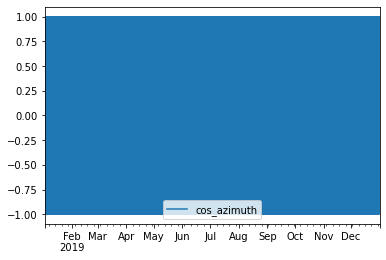

In [189]:
cosSZ.plot()

<AxesSubplot:>

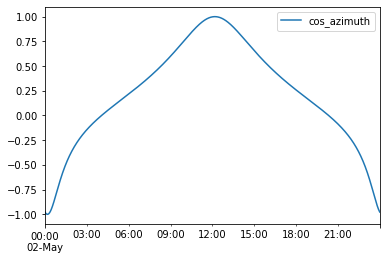

In [190]:
cosSZ.loc['2019-05-02'].plot()

In [192]:
eth2 = pvlib.irradiance.get_extra_radiation(naive_times, solar_constant = 1366.1, method = 'nrel')

In [194]:
eth2

2019-01-02 22:58:59-02:00    1412.890916
2019-01-02 22:59:00-02:00    1412.890916
2019-01-02 22:59:01-02:00    1412.890916
2019-01-02 22:59:02-02:00    1412.890916
2019-01-02 22:59:03-02:00    1412.890916
                                ...     
2019-12-31 23:47:00-03:00    1412.918828
2019-12-31 23:47:01-03:00    1412.918829
2019-12-31 23:47:02-03:00    1412.918829
2019-12-31 23:47:03-03:00    1412.918830
2019-12-31 23:47:04-03:00    1412.918831
Freq: S, Length: 31369686, dtype: float64

In [195]:
eth2.shape

(31369686,)

In [196]:
eth.shape

(31369686, 1)

In [197]:
cosSZA2 = np.cos(np.deg2rad(solpos.azimuth)).to_frame()

In [198]:
cosSZA2.shape

(31369686, 1)

In [199]:
cosSZA2

,azimuth
2019-01-02 22:58:59-02:00,-0.797366
2019-01-02 22:59:00-02:00,-0.797404
2019-01-02 22:59:01-02:00,-0.797441
2019-01-02 22:59:02-02:00,-0.797479
2019-01-02 22:59:03-02:00,-0.797517
...,...
2019-12-31 23:47:00-03:00,-0.988059
2019-12-31 23:47:01-03:00,-0.988072
2019-12-31 23:47:02-03:00,-0.988085
2019-12-31 23:47:03-03:00,-0.988098


In [208]:
t = eth[0]*1.5*(cosSZA2.azimuth**(1.2)) + 100

<AxesSubplot:>

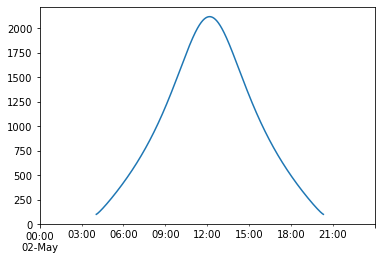

In [210]:
t.loc['2019-05-02'].plot()

In [202]:
eth

,0
2019-01-02 22:58:59-02:00,1412.890916
2019-01-02 22:59:00-02:00,1412.890916
2019-01-02 22:59:01-02:00,1412.890916
2019-01-02 22:59:02-02:00,1412.890916
2019-01-02 22:59:03-02:00,1412.890916
...,...
2019-12-31 23:47:00-03:00,1412.918828
2019-12-31 23:47:01-03:00,1412.918829
2019-12-31 23:47:02-03:00,1412.918829
2019-12-31 23:47:03-03:00,1412.918830


In [216]:
    ghiFLAG['PPmax'] = eth[0]*1.5*(cosSZA2.azimuth**(1.2)) + 100
    ghiFLAG['PPmin'] = PPmin
    ghiFLAG['ERmax'] = eth[0]*1.2*(cosSZA2.azimuth**(1.2)) + 50
    ghiFLAG['ERmin'] = ERmin


In [217]:
ghiFLAG

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22
2019-01-02 22:58:59-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:00-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:01-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:02-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:03-02:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:47:00-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:01-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:02-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:03-03:00,NaN,-4,NaN,-2,NaN,NaN,NaN,NaN,NaN


In [215]:
ghiFLAG = pd.DataFrame(columns = ['PPmax', 'PPmin', 'ERmax', 'ERmin',
                                 'F_GHIP_SI02pt100', 'F_GHIP_SMP11', 'F_GHIP_SMP22', 
                                 'F_GHIP_SPN1', 'F_GHIT_SMP22'])

In [241]:
novo = pd.merge(ghiFLAG, dfghi, left_index=True, right_index = True, how= 'outer')

In [243]:
novo.where(novo.GHIP_SI02pt100>novo.PPmax)

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
2019-01-02 22:58:59-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:01-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:02-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 22:59:03-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:47:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:01-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:02-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:47:03-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
ghiFLAG.dtypes

PPmax               float64
PPmin                 int64
ERmax               float64
ERmin                 int64
F_GHIP_SI02pt100     object
F_GHIP_SMP11         object
F_GHIP_SMP22         object
F_GHIP_SPN1          object
F_GHIT_SMP22         object
dtype: object

In [226]:
ghiFLAG.index

DatetimeIndex(['2019-01-02 22:58:59-02:00', '2019-01-02 22:59:00-02:00',
               '2019-01-02 22:59:01-02:00', '2019-01-02 22:59:02-02:00',
               '2019-01-02 22:59:03-02:00', '2019-01-02 22:59:04-02:00',
               '2019-01-02 22:59:05-02:00', '2019-01-02 22:59:06-02:00',
               '2019-01-02 22:59:07-02:00', '2019-01-02 22:59:08-02:00',
               ...
               '2019-12-31 23:46:55-03:00', '2019-12-31 23:46:56-03:00',
               '2019-12-31 23:46:57-03:00', '2019-12-31 23:46:58-03:00',
               '2019-12-31 23:46:59-03:00', '2019-12-31 23:47:00-03:00',
               '2019-12-31 23:47:01-03:00', '2019-12-31 23:47:02-03:00',
               '2019-12-31 23:47:03-03:00', '2019-12-31 23:47:04-03:00'],
              dtype='datetime64[ns, Brazil/East]', length=31369686, freq='S')

In [231]:
dfghi.index

DatetimeIndex(['2019-01-02 22:58:59-02:00', '2019-01-02 22:59:00-02:00',
               '2019-01-02 22:59:01-02:00', '2019-01-02 22:59:02-02:00',
               '2019-01-02 22:59:03-02:00', '2019-01-02 22:59:04-02:00',
               '2019-01-02 22:59:05-02:00', '2019-01-02 22:59:06-02:00',
               '2019-01-02 22:59:07-02:00', '2019-01-02 22:59:08-02:00',
               ...
               '2019-12-31 23:46:55-03:00', '2019-12-31 23:46:56-03:00',
               '2019-12-31 23:46:57-03:00', '2019-12-31 23:46:58-03:00',
               '2019-12-31 23:46:59-03:00', '2019-12-31 23:47:00-03:00',
               '2019-12-31 23:47:01-03:00', '2019-12-31 23:47:02-03:00',
               '2019-12-31 23:47:03-03:00', '2019-12-31 23:47:04-03:00'],
              dtype='datetime64[ns, Brazil/East]', name='TIMESTAMP', length=29760173, freq=None)

In [230]:
dfghi.index = dfghi.index.tz_localize(location.tz)